# Stress Level Prediction with Neural Networks
This notebook demonstrates how to build a basic neural network to predict student stress levels using TensorFlow and visualize the results.

In [1]:
# Import required libraries
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  # Optional: disables oneDNN optimizations

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\isai5\OneDrive\Documentos\Github\databases\StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


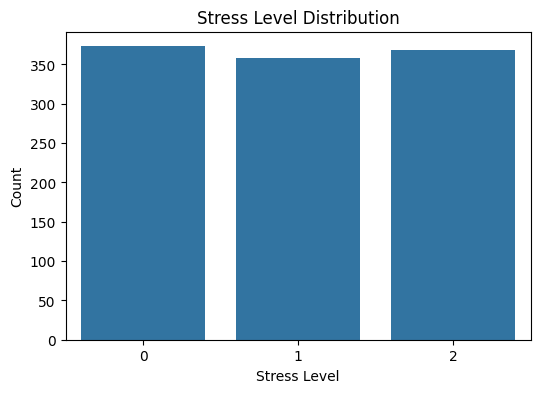

In [3]:
# Visualize the distribution of stress_level
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=df)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

In [4]:
# Show basic statistics for stress_level
print("Basic statistics for stress_level:")
print(df['stress_level'].describe())
print("\nMost frequent value (mode):")
print(df['stress_level'].mode()[0])

Basic statistics for stress_level:
count    1100.000000
mean        0.996364
std         0.821673
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: stress_level, dtype: float64

Most frequent value (mode):
0


In [5]:
# Prepare data for training and testing
X = df.drop('stress_level', axis=1).select_dtypes(include=['number'])
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build and train the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

c:\Users\isai5\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8636 - loss: 0.2718 
Test accuracy: 0.86
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8636 - loss: 0.2718 
Test accuracy: 0.86


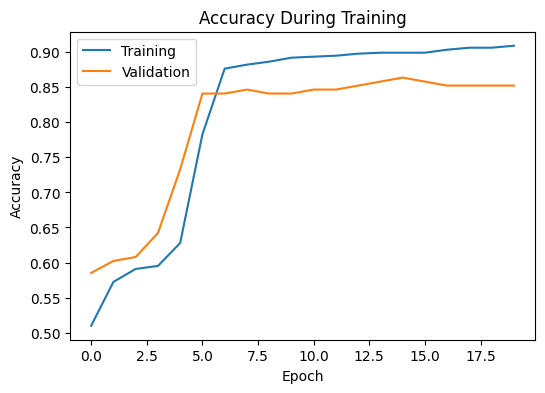

In [8]:
# Plot the accuracy curve during training
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


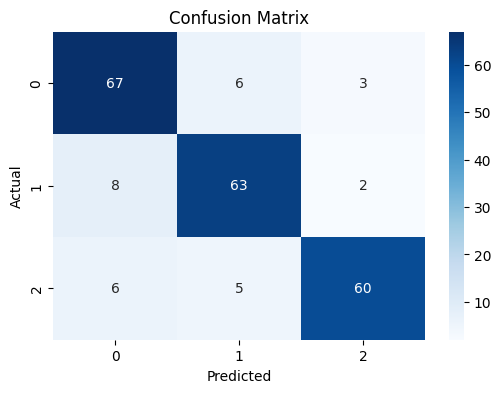

In [9]:
# Plot the confusion matrix for model predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Print classification report and a simple conclusion
print("Classification report:")
print(classification_report(y_test, y_pred_classes))

print("Conclusion:")
if accuracy > 0.7:
    print("The model performs well in predicting stress level.")
else:
    print("The model can be improved. Try tuning hyperparameters or using more data.")

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.85      0.86      0.86        73
           2       0.92      0.85      0.88        71

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220

Conclusion:
The model performs well in predicting stress level.
